In [1]:
import numpy
numpy.version.version

'1.26.0'

In [2]:
import pandas
pandas.__version__

'2.1.1'

In [1]:
import pandas as pd

file_path = "Solar Power Plant Data.csv"
df = pd.read_csv(file_path)
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [4]:
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format="%d.%m.%Y-%H:%M")

missing_values = df.isnull().sum()

df['Hour'] = df['Date-Hour(NMT)'].dt.hour
df['Month'] = df['Date-Hour(NMT)'].dt.month


df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Hour,Month
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0,0,1
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0,1,1
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0,2,1
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0,3,1
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0,4,1


In [5]:
df.sample(3)

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Hour,Month
8115,2017-12-05 03:00:00,0.5,0,1013.1,-7.4,-3.1,84,0.0000,3,12
4783,2017-07-19 07:00:00,3.0,30,1019.9,215.0,14.9,53,451.6667,7,7
1145,2017-02-17 17:00:00,0.1,0,1017.2,24.6,-0.2,85,0.0000,17,2


In [6]:
df.to_csv('Solar_final_data_trainig.csv')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare the data for modeling
X = df[['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity', 'Month', 'Hour']]
y = df['SystemProduction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 310437.05
R^2 Score: 0.84


In [8]:
# training data r2_score:

y_pred_train = model.predict(X_train_scaled)
r2_score(y_train, y_pred_train)

0.9801794318414758

In [9]:
X_test

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,Month,Hour
362,0.8,0,1024.7,-6.6,-8.4,81,1,2
3746,3.8,0,1005.3,-6.6,11.9,95,6,2
5333,1.6,4,1013.6,1.5,10.7,100,8,5
7342,1.6,0,1011.1,-7.7,0.7,79,11,22
5798,3.1,60,1009.2,515.0,18.5,45,8,14
...,...,...,...,...,...,...,...,...
2682,4.2,55,1010.0,268.8,9.2,30,4,18
7532,2.3,0,991.9,-4.6,2.4,89,11,20
7431,1.9,60,1017.0,109.6,6.5,74,11,15
4564,1.9,0,1007.8,-6.0,14.0,84,7,4


In [11]:
temp = X_test
temp['Predicted_Production'] = y_pred
temp.loc[(temp['Sunshine'] == 0.0) & (temp['Radiation'] < 0.0), 'Predicted_Production'] = 0.0

new_y_pred = temp['Predicted_Production']
r2_score(y_test, new_y_pred)

0.8448922190395346

In [12]:
temp[(temp['Sunshine'] == 0.0) & (temp['Radiation'] < 0.0)]

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,Month,Hour,Predicted_Production
362,0.8,0,1024.7,-6.6,-8.4,81,1,2,0.0
3746,3.8,0,1005.3,-6.6,11.9,95,6,2,0.0
7342,1.6,0,1011.1,-7.7,0.7,79,11,22,0.0
1294,1.2,0,989.8,-7.5,-5.1,72,2,22,0.0
985,4.8,0,1042.9,-5.1,-3.4,79,2,1,0.0
...,...,...,...,...,...,...,...,...,...
7251,3.2,0,1014.5,-6.5,2.5,51,10,3,0.0
239,6.1,0,995.2,-4.4,3.8,96,1,23,0.0
7532,2.3,0,991.9,-4.6,2.4,89,11,20,0.0
4564,1.9,0,1007.8,-6.0,14.0,84,7,4,0.0


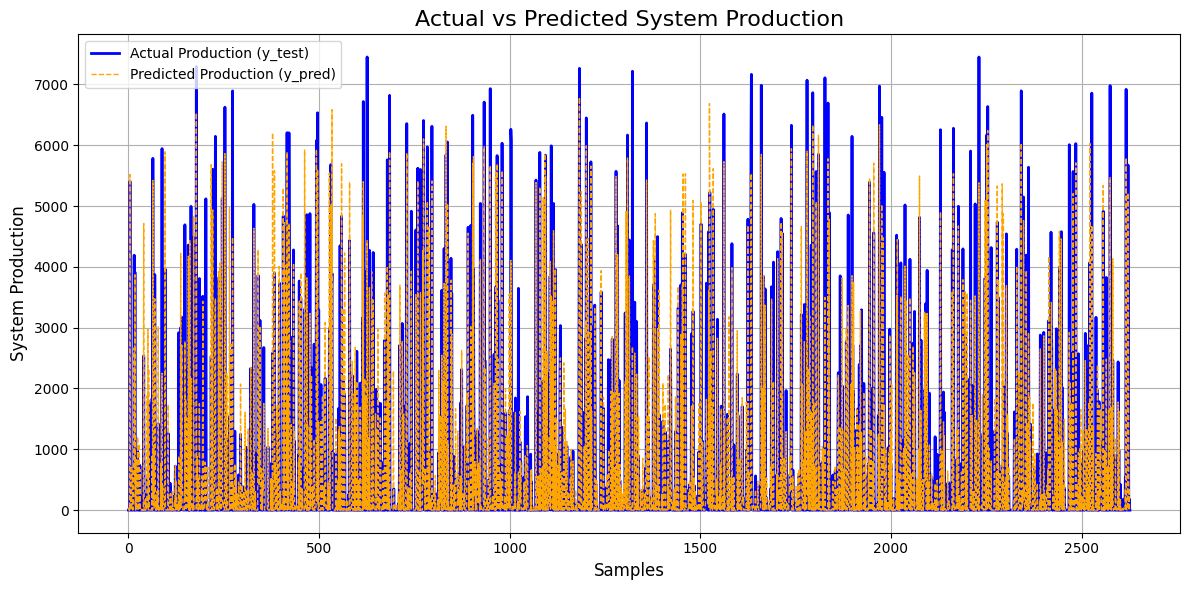

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Optionally reset index if you're using pandas Series
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Production (y_test)', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Production (y_pred)', color='orange', linestyle='--', linewidth=1)
plt.title("Actual vs Predicted System Production", fontsize=16)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("System Production", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import joblib
# Save the model and scaler into a dictionary
model_bundle = {
    'scaler': scaler,
    'model': model
}
# Dump to pkl file
joblib.dump(model_bundle, 'solar_power_rf_model.pkl')
print("Model and scaler saved successfully to 'wind_power_rf_model.pkl'")

Model and scaler saved successfully to 'wind_power_rf_model.pkl'


In [15]:
model = joblib.load('solar_power_rf_model.pkl')

In [16]:
import requests
import pandas as pd
from datetime import datetime

def fetch_weather_data(latitude=23.276474, longitude=77.460590, forecast_days=5):
    """
    Fetch hourly weather forecast for a given location using Open-Meteo API.

    Returns:
        DataFrame: Cleaned and structured hourly weather data
    """
    url = (
        f"https://api.open-meteo.com/v1/forecast?"
        f"latitude={latitude}&longitude={longitude}"
        "&hourly=temperature_2m,relative_humidity_2m,pressure_msl,"
        "direct_radiation,windspeed_10m,sunshine_duration"
        f"&forecast_days={forecast_days}&timezone=auto"
    )

    response = requests.get(url)

    if response.status_code != 200:
        raise Exception("Failed to fetch weather data")

    data = response.json()
    hourly = data['hourly']

    # Create DataFrame
    df = pd.DataFrame({
        'time': pd.to_datetime(hourly['time']),
        'WindSpeed': hourly['windspeed_10m'],
        'Sunshine': [s / 60 for s in hourly['sunshine_duration']],  # convert seconds to hours
        'AirPressure': hourly['pressure_msl'],
        'Radiation': hourly['direct_radiation'],
        'AirTemperature': hourly['temperature_2m'],
        'RelativeAirHumidity': hourly['relative_humidity_2m'],
    })

    # Extract month and hour from datetime
    df['Month'] = df['time'].dt.month
    df['Hour'] = df['time'].dt.hour
    df['Date'] = df['time'].dt.date  # for daily aggregation

    return df

In [17]:
import joblib
# from sklearn.preprocessing import StandardScaler

# Load your model and scaler
model_bundle = joblib.load('solar_power_rf_model.pkl')
scaler = model_bundle['scaler']
model = model_bundle['model']

# Get weather forecast data
df_weather = fetch_weather_data()

df_weather['Radiation'] = df_weather['Radiation'] - np.median(df_weather['Radiation'])

# Select feature columns in the same order used during training
features = ['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
            'AirTemperature', 'RelativeAirHumidity', 'Month', 'Hour']
X_future = df_weather[features]

# Scale input features
X_scaled = scaler.transform(X_future)

# Predict
df_weather['Predicted_Production'] = model.predict(X_scaled)

# Apply condition: if Sunshine is 0.0 and Radiation is negative, set production to 0.0
df_weather.loc[(df_weather['Sunshine'] == 0.0) & (df_weather['Radiation'] < 0.0), 'Predicted_Production'] = 0.0

# Show hourly predictions
print("\nHourly Predictions:")
print(df_weather[['time', 'Predicted_Production']])

# Filter rows where Hour is > 6 and <= 20
df_daylight = df_weather[(df_weather['Hour'] > 6) & (df_weather['Hour'] <= 20)]

# Group by Date and sum the predicted production
daily_total = df_daylight.groupby('Date')['Predicted_Production'].sum()

# Print the result
print("\nFiltered Daily Total Production (07:00 to 20:00):")
print(daily_total)


Hourly Predictions:
                   time  Predicted_Production
0   2025-05-04 00:00:00              0.000000
1   2025-05-04 01:00:00              0.000000
2   2025-05-04 02:00:00              0.000000
3   2025-05-04 03:00:00              0.000000
4   2025-05-04 04:00:00              0.000000
..                  ...                   ...
115 2025-05-08 19:00:00            249.285008
116 2025-05-08 20:00:00              0.000000
117 2025-05-08 21:00:00              0.000000
118 2025-05-08 22:00:00              0.000000
119 2025-05-08 23:00:00              0.000000

[120 rows x 2 columns]

Filtered Daily Total Production (07:00 to 20:00):
Date
2025-05-04    29119.262511
2025-05-05    15708.783417
2025-05-06    26709.913820
2025-05-07    34384.843486
2025-05-08    37193.701743
Name: Predicted_Production, dtype: float64
